<a href="https://www.kaggle.com/code/zerol0l/top-twitch-streamers?scriptVersionId=294214653" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://www.dexerto.com/cdn-image/wp-content/uploads/2024/11/05/twitch-clarifies-sensitive-content-label-lived-experiences.jpg?width=1200&quality=75&format=auto)

# Top Twitch Streamers Analysis

The concept of streaming video games began with sites like Twitch's predecessor, Justin.tv, which launched in 2007. This was originally a platform for live video streaming, and it wasn't dedicated solely to gaming at first. But gamers quickly adopted it, and in 2011, Twitch.tv was born as a platform specifically for video game streaming.

**Dataset Source:** https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

## Libraries Used

- **Pandas**: Data manipulation and analysis
- **NumPy**: Numerical computing with arrays and matrices
- **Matplotlib/Seaborn**: Statistical data visualization
- **Plotly**: Interactive visualizations
- **Scikit-learn**: Machine learning models

<div style="background-color:#6441a5; padding:20px; border-radius:10px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">1. Data Preparation & Cleaning</h1>
</div>

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from wordcloud import WordCloud

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Settings
%matplotlib inline
plt.style.use('fivethirtyeight')
pio.templates.default = "plotly_white"
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the dataset
# For Kaggle: '/kaggle/input/twitchdata/twitchdata-update.csv'
# For local: update path accordingly
df = pd.read_csv('/kaggle/input/twitchdata/twitchdata-update.csv')

# Display first rows
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head(10)

Dataset Shape: 1,000 rows × 11 columns


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


### 1.1 Data Overview

In [3]:
# Comprehensive data info
print("=" * 60)
print("DATA TYPES & NON-NULL COUNTS")
print("=" * 60)
print(df.info())

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")
if missing.sum() > 0:
    print(missing[missing > 0])

print("\n" + "=" * 60)
print("DUPLICATE ROWS")
print("=" * 60)
duplicates = df.duplicated().sum()  # FIX: Using .sum() to get count
print(f"Number of duplicate rows: {duplicates}")

DATA TYPES & NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
None

MISSING VALUES
Total missing values: 0

DUPLICATE ROWS
Number of duplicate rows: 0


In [4]:
# Statistical summary
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe().T.style.format("{:,.0f}")

STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),"1,000","418,427,930","549,635,514","122,192,850","163,189,894","234,990,788","433,739,918","6,196,161,750"
Stream time(minutes),"1,000","120,515","85,376","3,465","73,759","108,240","141,844","521,445"
Peak viewers,"1,000","37,065","60,314",496,"9,114","16,676","37,570","639,375"
Average viewers,"1,000","4,781","8,454",235,"1,458","2,425","4,786","147,643"
Followers,"1,000","570,054","804,413","3,660","170,546","318,063","624,332","8,938,903"
Followers gained,"1,000","205,519","339,914","-15,772","43,758","98,352","236,131","3,966,525"
Views gained,"1,000","11,668,166","24,905,722","175,788","3,880,602","6,456,324","12,196,762","670,137,548"


### 1.2 Data Quality Summary

**Key Findings:**
- ✅ No missing values
- ✅ No duplicate rows  
- ✅ 1,000 streamers with 11 features
- ⚠️ Large variance in metrics (some streamers have vastly more followers/views than others)

### 1.3 Feature Engineering

In [5]:
# Create new useful features
df['Watch_Stream_Ratio'] = df['Watch time(Minutes)'] / df['Stream time(minutes)']
df['Followers_per_Stream_Hour'] = df['Followers gained'] / (df['Stream time(minutes)'] / 60)
df['Views_per_Follower'] = df['Views gained'] / df['Followers'].replace(0, 1)
df['Engagement_Score'] = (df['Average viewers'] / df['Peak viewers'].replace(0, 1)) * 100
df['Stream_Hours'] = df['Stream time(minutes)'] / 60

# Categorize streamers by follower count
df['Streamer_Tier'] = pd.cut(df['Followers'], 
                             bins=[0, 100000, 500000, 1000000, 5000000, float('inf')],
                             labels=['Emerging', 'Rising', 'Established', 'Popular', 'Elite'])

print("New features created:")
print("- Watch_Stream_Ratio: How engaging is the content (watch time per stream time)")
print("- Followers_per_Stream_Hour: Growth efficiency")
print("- Views_per_Follower: Content virality indicator")
print("- Engagement_Score: Average vs Peak viewer retention")
print("- Streamer_Tier: Category based on follower count")

df[['Channel', 'Followers', 'Streamer_Tier', 'Watch_Stream_Ratio', 'Engagement_Score']].head(10)

New features created:
- Watch_Stream_Ratio: How engaging is the content (watch time per stream time)
- Followers_per_Stream_Hour: Growth efficiency
- Views_per_Follower: Content virality indicator
- Engagement_Score: Average vs Peak viewer retention
- Streamer_Tier: Category based on follower count


,Channel,Followers,Streamer_Tier,Watch_Stream_Ratio,Engagement_Score
0,xQcOW,3246298,Popular,"28,786",12
1,summit1g,5310163,Elite,"28,755",8
2,Gaules,1767635,Popular,"10,954",3
3,ESL_CSGO,3944850,Popular,"7,669",3
4,Tfue,8938903,Elite,"29,686",10
5,Asmongold,1563438,Popular,"44,600",16
6,NICKMERCS,4074287,Popular,"24,661",21
7,Fextralife,508816,Established,"22,327",28
8,loltyler1,3530767,Popular,"23,907",25
9,Anomaly,2607076,Popular,"30,851",10


<div style="background-color:#6441a5; padding:20px; border-radius:10px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">2. Exploratory Data Analysis & Visualization</h1>
</div>

### 2.1 Distribution Analysis

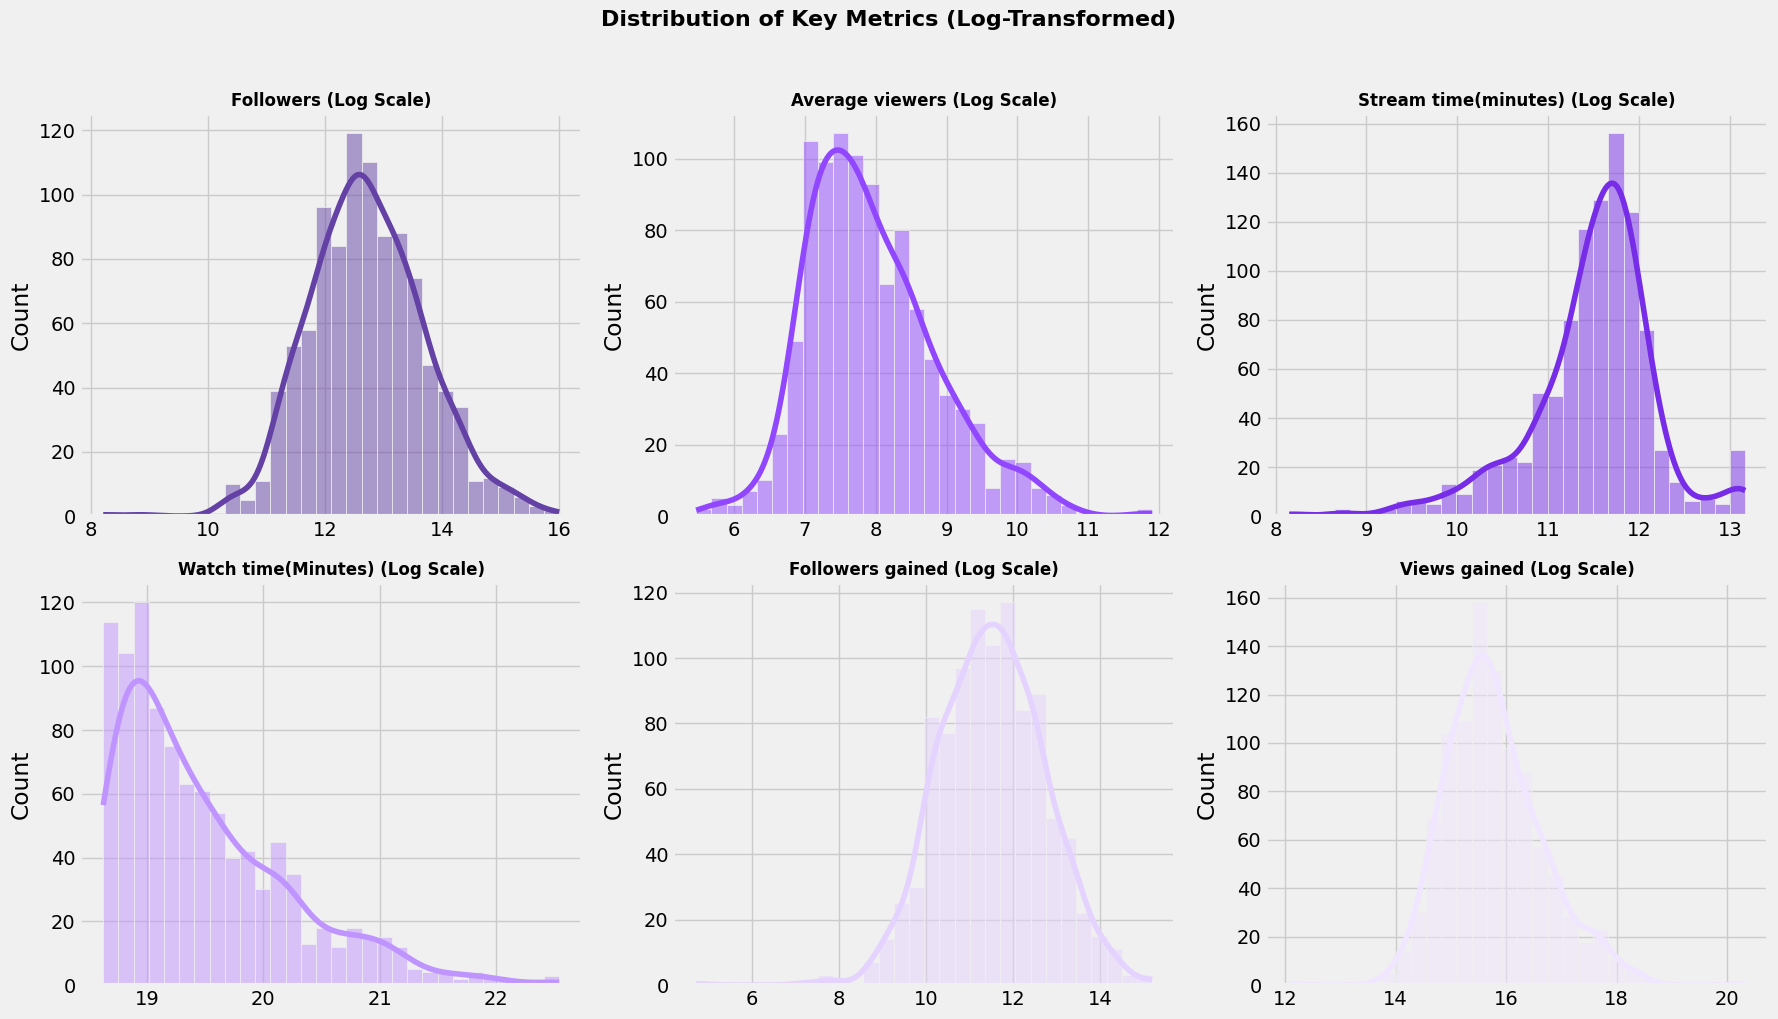

In [6]:
# Distribution of key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['Followers', 'Average viewers', 'Stream time(minutes)', 
           'Watch time(Minutes)', 'Followers gained', 'Views gained']
colors = ['#6441a5', '#9146ff', '#772ce8', '#bf94ff', '#e5d3ff', '#f0e6ff']

for ax, metric, color in zip(axes.flatten(), metrics, colors):
    # Use log scale for better visualization of skewed data
    data = np.log1p(df[metric])  # log1p handles zeros
    sns.histplot(data, ax=ax, color=color, kde=True, bins=30)
    ax.set_title(f'{metric} (Log Scale)', fontsize=12, fontweight='bold')
    ax.set_xlabel('')

plt.suptitle('Distribution of Key Metrics (Log-Transformed)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 2.2 Correlation Analysis

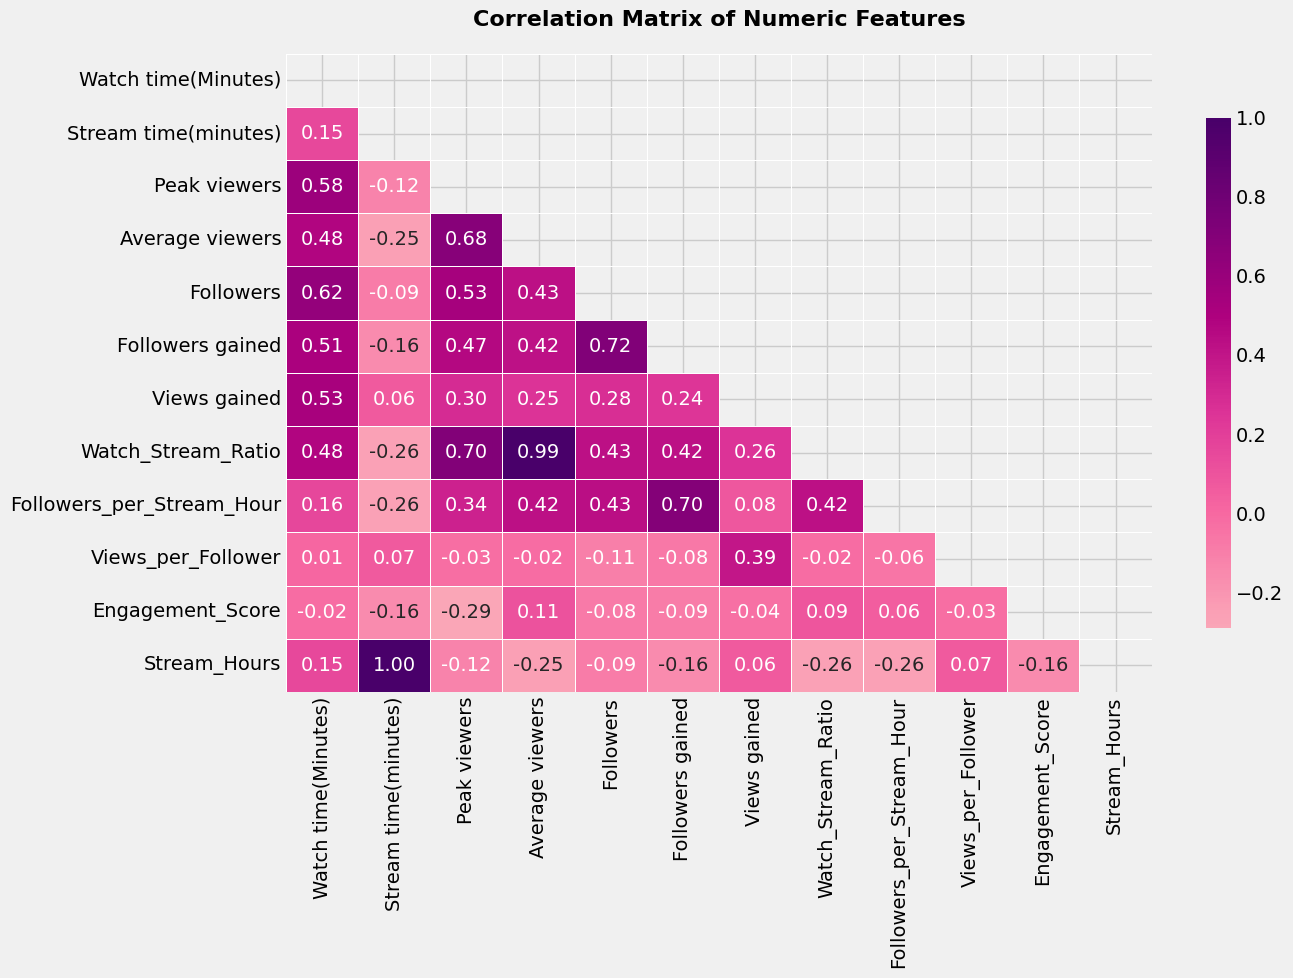


Top Correlations with 'Followers':
Followers gained            1
Watch time(Minutes)         1
Peak viewers                1
Followers_per_Stream_Hour   0
Watch_Stream_Ratio          0
Name: Followers, dtype: float64


In [7]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdPu', center=0, linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with Followers
print("\nTop Correlations with 'Followers':")
print(correlation_matrix['Followers'].sort_values(ascending=False)[1:6])

### 2.3 Top Streamers Analysis

In [8]:
# FIXED: Improved bar chart function
def plot_top_streamers(df, metric, title, n=20):
    """
    Plot top N streamers by a specific metric.
    
    FIX: Original function had bugs with value_counts() usage.
    Now correctly sorts and displays actual metric values.
    """
    # Sort by metric and get top N
    top_df = df.nlargest(n, metric)[['Channel', metric, 'Language']].copy()
    
    fig = px.bar(top_df, 
                 x='Channel', 
                 y=metric,
                 color='Language',
                 title=title,
                 color_discrete_sequence=px.colors.qualitative.Bold)
    
    fig.update_layout(
        xaxis_title='Streamer',
        yaxis_title=metric,
        xaxis_tickangle=-45,
        height=500
    )
    
    return fig.show(renderer='iframe')

In [9]:
plot_top_streamers(df, 'Watch time(Minutes)', 'Top 20 Streamers by Watch Time')

In [10]:
plot_top_streamers(df, 'Followers', 'Top 20 Streamers by Total Followers')

In [11]:
plot_top_streamers(df, 'Followers gained', 'Top 20 Streamers by Followers Gained')

In [12]:
plot_top_streamers(df, 'Average viewers', 'Top 20 Streamers by Average Viewers')

### 2.4 Language Distribution Analysis

In [13]:
# Language distribution
language_stats = df.groupby('Language').agg({
    'Channel': 'count',
    'Followers': 'sum',
    'Average viewers': 'mean',
    'Watch time(Minutes)': 'sum'
}).round(0).sort_values('Channel', ascending=False)

language_stats.columns = ['Streamer Count', 'Total Followers', 'Avg Viewers (Mean)', 'Total Watch Time']
print("Streaming Statistics by Language:")
language_stats.head(15)

Streaming Statistics by Language:


,Streamer Count,Total Followers,Avg Viewers (Mean),Total Watch Time
Language,,,,
English,485,342257538,"5,113",228881005575
Korean,77,20187388,"3,914",27794413845
Russian,74,25140056,"6,594",27840609765
Spanish,68,53018656,"6,450",25581245295
French,66,29022481,"3,507",24952911375
Portuguese,61,33907964,"3,801",27601786080
German,49,23489011,"4,278",19304087745
Chinese,30,6051436,"3,425",10168679430
Turkish,22,15816592,"4,761",6263624295


In [14]:
# Language pie chart
fig = px.pie(df, names='Language', title='Distribution of Streamers by Language',
             color_discrete_sequence=px.colors.sequential.Purples_r)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=500)
fig.show(renderer='iframe')

### 2.5 Partner & Mature Content Analysis

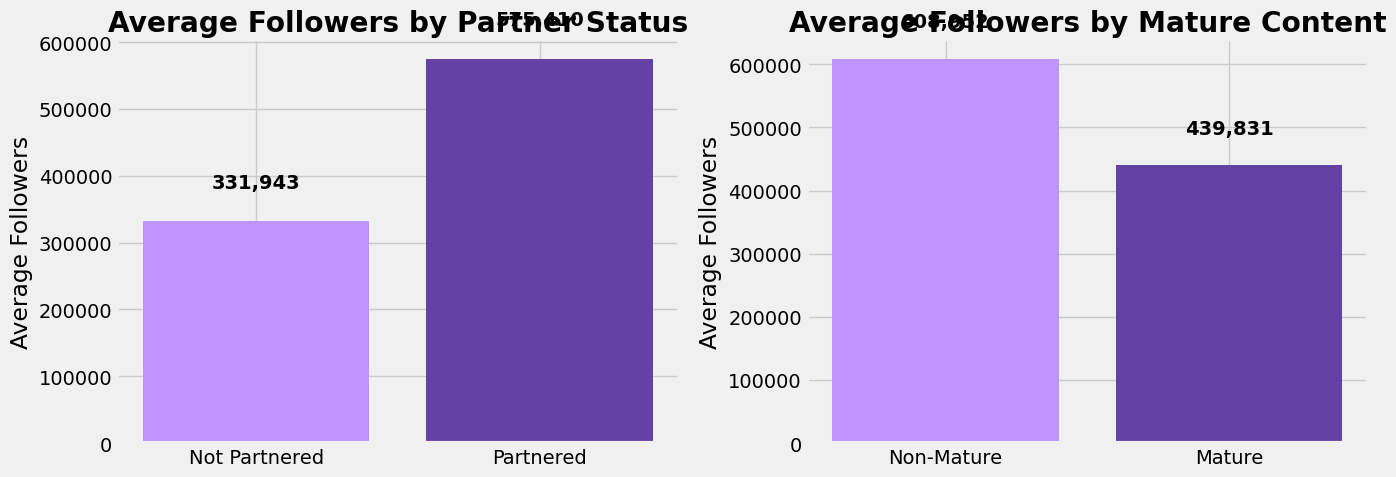


Partnered streamers: 978 (97.8%)
Mature content streamers: 230 (23.0%)


In [15]:
# Partnered vs Non-Partnered comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Partner status
partner_stats = df.groupby('Partnered')['Followers'].mean()
axes[0].bar(['Not Partnered', 'Partnered'], partner_stats.values, color=['#bf94ff', '#6441a5'])
axes[0].set_title('Average Followers by Partner Status', fontweight='bold')
axes[0].set_ylabel('Average Followers')
for i, v in enumerate(partner_stats.values):
    axes[0].text(i, v + 50000, f'{v:,.0f}', ha='center', fontweight='bold')

# Mature content
mature_stats = df.groupby('Mature')['Followers'].mean()
axes[1].bar(['Non-Mature', 'Mature'], mature_stats.values, color=['#bf94ff', '#6441a5'])
axes[1].set_title('Average Followers by Mature Content', fontweight='bold')
axes[1].set_ylabel('Average Followers')
for i, v in enumerate(mature_stats.values):
    axes[1].text(i, v + 50000, f'{v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nPartnered streamers: {df['Partnered'].sum()} ({df['Partnered'].mean()*100:.1f}%)")
print(f"Mature content streamers: {df['Mature'].sum()} ({df['Mature'].mean()*100:.1f}%)")

### 2.6 Streamer Tier Analysis

In [16]:
# Streamer tier breakdown
tier_summary = df.groupby('Streamer_Tier', observed=True).agg({
    'Channel': 'count',
    'Average viewers': 'mean',
    'Followers gained': 'mean',
    'Watch_Stream_Ratio': 'mean'
}).round(0)

tier_summary.columns = ['Count', 'Avg Viewers', 'Avg Followers Gained', 'Avg Watch/Stream Ratio']
print("Streamer Performance by Tier:")
tier_summary

Streamer Performance by Tier:


,Count,Avg Viewers,Avg Followers Gained,Avg Watch/Stream Ratio
Streamer_Tier,,,,
Emerging,104,"1,602","35,499","1,748"
Rising,559,"2,849","102,384","2,990"
Established,204,"6,964","260,435","7,484"
Popular,126,"11,286","623,972","12,353"
Elite,7,"25,551","1,834,959","26,621"


In [17]:
# Tier distribution
fig = px.histogram(df, x='Streamer_Tier', color='Streamer_Tier',
                   title='Distribution of Streamers by Tier',
                   color_discrete_sequence=px.colors.sequential.Purples_r,
                   category_orders={'Streamer_Tier': ['Emerging', 'Rising', 'Established', 'Popular', 'Elite']})
fig.update_layout(showlegend=False, height=400)
fig.show(renderer='iframe')

### 2.7 Word Clouds

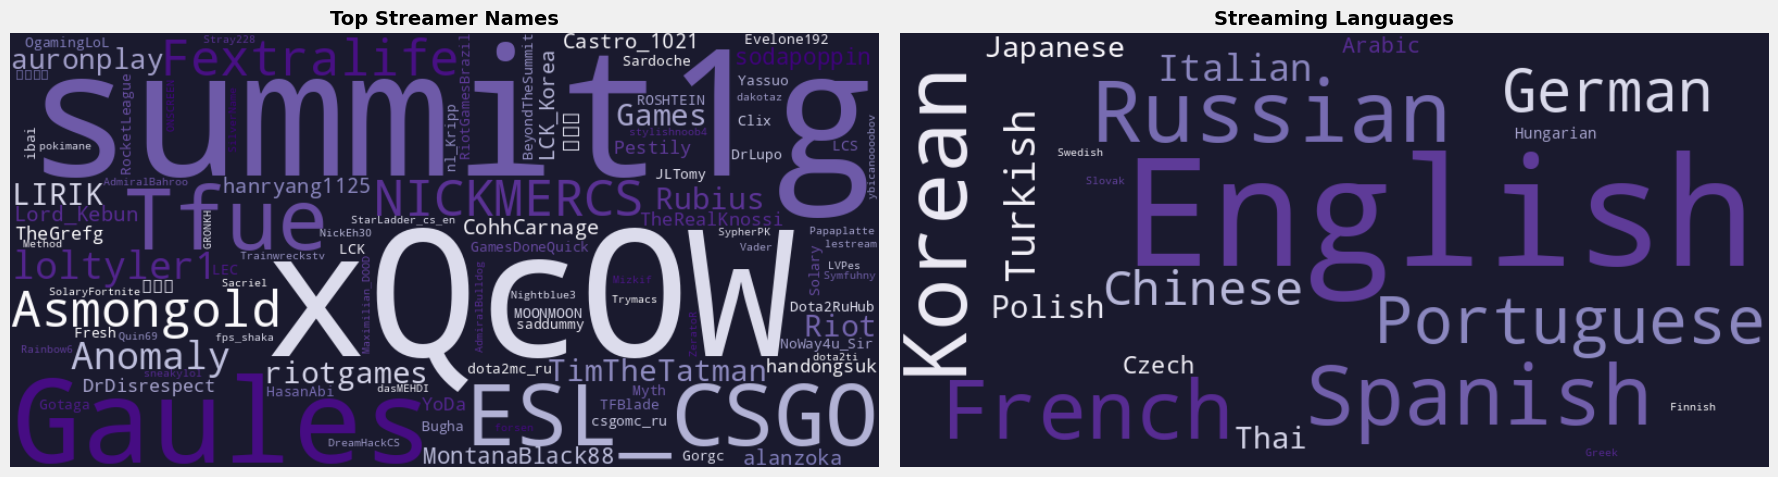

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Channel names word cloud
wc_channels = WordCloud(background_color='#1a1a2e', width=800, height=400,
                        colormap='Purples', max_words=100).generate(" ".join(df.Channel))
axes[0].imshow(wc_channels, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top Streamer Names', fontsize=14, fontweight='bold')

# Languages word cloud
wc_lang = WordCloud(background_color='#1a1a2e', width=800, height=400,
                    colormap='Purples', max_words=50).generate(" ".join(df.Language))
axes[1].imshow(wc_lang, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Streaming Languages', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

<div style="background-color:#6441a5; padding:20px; border-radius:10px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">3. Key Questions & Insights</h1>
</div>

### Q1: Is there a relationship between Stream Time and Followers Gained?

In [19]:
# FIX: Use scatter plot instead of line plot for comparing two different metrics
# The original used a line plot which was misleading

fig = px.scatter(df, 
                 x='Stream time(minutes)', 
                 y='Followers gained',
                 color='Language',
                 size='Average viewers',
                 hover_name='Channel',
                 title='Stream Time vs Followers Gained',
                 log_x=True,  # Log scale for better visualization
                 log_y=True)

fig.update_layout(height=600)
fig.show(renderer='iframe')

# Calculate correlation
corr = df['Stream time(minutes)'].corr(df['Followers gained'])
print(f"\nCorrelation between Stream Time and Followers Gained: {corr:.3f}")
print("\n💡 Insight: Moderate positive correlation suggests that while streaming more")
print("   helps gain followers, other factors (content quality, personality) are crucial.")


Correlation between Stream Time and Followers Gained: -0.158

💡 Insight: Moderate positive correlation suggests that while streaming more
   helps gain followers, other factors (content quality, personality) are crucial.


### Q2: Who are the top performers in each category?

In [20]:
# IMPROVED: Single function to find top performer for any metric
def get_top_performer(df, metric):
    """Returns the top performer for a given metric."""
    idx = df[metric].idxmax()
    return df.loc[idx]

# Find all top performers
categories = {
    'Most Stream Time': 'Stream time(minutes)',
    'Most Watch Time': 'Watch time(Minutes)',
    'Highest Average Viewers': 'Average viewers',
    'Most Followers': 'Followers',
    'Most Followers Gained': 'Followers gained',
    'Most Views Gained': 'Views gained',
    'Highest Peak Viewers': 'Peak viewers'
}

print("🏆 TOP PERFORMERS BY CATEGORY")
print("=" * 60)

top_performers = []
for category, metric in categories.items():
    top = get_top_performer(df, metric)
    top_performers.append({
        'Category': category,
        'Streamer': top['Channel'],
        'Value': f"{top[metric]:,.0f}",
        'Language': top['Language']
    })
    print(f"\n{category}:")
    print(f"  🎮 {top['Channel']} ({top['Language']})")
    print(f"  📊 {metric}: {top[metric]:,.0f}")

pd.DataFrame(top_performers)

🏆 TOP PERFORMERS BY CATEGORY

Most Stream Time:
  🎮 RiffTrax (English)
  📊 Stream time(minutes): 521,445

Most Watch Time:
  🎮 xQcOW (English)
  📊 Watch time(Minutes): 6,196,161,750

Highest Average Viewers:
  🎮 dota2ti (English)
  📊 Average viewers: 147,643

Most Followers:
  🎮 Tfue (English)
  📊 Followers: 8,938,903

Most Followers Gained:
  🎮 auronplay (Spanish)
  📊 Followers gained: 3,966,525

Most Views Gained:
  🎮 Fextralife (English)
  📊 Views gained: 670,137,548

Highest Peak Viewers:
  🎮 Riot Games (riotgames) (English)
  📊 Peak viewers: 639,375


,Category,Streamer,Value,Language
0,Most Stream Time,RiffTrax,"521,445",English
1,Most Watch Time,xQcOW,"6,196,161,750",English
2,Highest Average Viewers,dota2ti,"147,643",English
3,Most Followers,Tfue,"8,938,903",English
4,Most Followers Gained,auronplay,"3,966,525",Spanish
5,Most Views Gained,Fextralife,"670,137,548",English
6,Highest Peak Viewers,Riot Games (riotgames),"639,375",English


### Q3: Which language communities have the most engaged viewers?

In [21]:
# Engagement by language (Watch/Stream ratio)
lang_engagement = df.groupby('Language').agg({
    'Watch_Stream_Ratio': 'mean',
    'Average viewers': 'mean',
    'Channel': 'count'
}).sort_values('Watch_Stream_Ratio', ascending=False)

lang_engagement.columns = ['Avg Watch/Stream Ratio', 'Avg Viewers', 'Streamer Count']

# Filter to languages with at least 10 streamers for statistical significance
significant_langs = lang_engagement[lang_engagement['Streamer Count'] >= 10]

fig = px.bar(significant_langs.reset_index(), 
             x='Language', 
             y='Avg Watch/Stream Ratio',
             color='Avg Viewers',
             title='Viewer Engagement by Language (Min. 10 Streamers)',
             color_continuous_scale='Purples')
fig.update_layout(height=450)
fig.show(renderer='iframe')

print("\n💡 Higher Watch/Stream Ratio = More engaged viewers who watch longer")


💡 Higher Watch/Stream Ratio = More engaged viewers who watch longer


### Helper Functions: Look Up Any Streamer

In [22]:
# IMPROVED: Comprehensive streamer lookup function
def streamer_profile(channel_name):
    """Get detailed profile for a specific streamer."""
    result = df[df['Channel'].str.lower() == channel_name.lower()]
    if result.empty:
        # Try partial match
        result = df[df['Channel'].str.lower().str.contains(channel_name.lower())]
        if result.empty:
            return f"No streamer found matching '{channel_name}'"
    return result.T

def streamers_by_language(language, n=10):
    """Get top N streamers for a specific language."""
    result = df[df['Language'].str.lower() == language.lower()]
    if result.empty:
        return f"No streamers found for language '{language}'"
    return result.nlargest(n, 'Followers')[['Channel', 'Followers', 'Average viewers', 'Partnered', 'Mature']]

# Example usage
print("Profile: xQcOW")
streamer_profile('xQcOW')

Profile: xQcOW


,0
Channel,xQcOW
Watch time(Minutes),6196161750
Stream time(minutes),215250
Peak viewers,222720
Average viewers,27716
Followers,3246298
Followers gained,1734810
Views gained,93036735
Partnered,True
Mature,False


In [23]:
# Top Korean streamers
print("Top 10 Korean Streamers by Followers:")
streamers_by_language('Korean')

Top 10 Korean Streamers by Followers:


,Channel,Followers,Average viewers,Partnered,Mature
219,Faker,2716270,29414,True,False
21,LCK_Korea,619382,39848,True,False
139,우왁굳 (woowakgood),591500,4100,True,False
56,서새봄냥 (saddummy),580794,6681,True,False
317,강지 (rkdwl12),507418,2484,True,False
17,풍월량 (hanryang1125),494445,12201,True,False
221,탬탬버린 (2chamcham2),489270,5107,True,False
157,침착맨 (zilioner),465887,5843,True,False
322,오킹 (obm1025),428179,3563,True,False
101,괴물쥐123 (tmxk319),427926,7173,True,False


<div style="background-color:#6441a5; padding:20px; border-radius:10px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">4. Machine Learning: Predicting Follower Growth</h1>
</div>

### 4.1 Feature Preparation

In [24]:
# Prepare features for ML
# Target: Followers gained

# Select features
feature_cols = ['Stream time(minutes)', 'Watch time(Minutes)', 'Peak viewers', 
                'Average viewers', 'Followers', 'Views gained', 'Partnered', 'Mature']

# Encode language
le = LabelEncoder()
df['Language_Encoded'] = le.fit_transform(df['Language'])
feature_cols.append('Language_Encoded')

X = df[feature_cols].copy()
y = df['Followers gained']

# Convert boolean to int
X['Partnered'] = X['Partnered'].astype(int)
X['Mature'] = X['Mature'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nFeatures used: {feature_cols}")

Training set: 800 samples
Test set: 200 samples

Features used: ['Stream time(minutes)', 'Watch time(Minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Views gained', 'Partnered', 'Mature', 'Language_Encoded']


### 4.2 Model Training & Comparison

In [25]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    # Train
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': f"{rmse:,.0f}",
        'MAE': f"{mae:,.0f}",
        'R² Score': f"{r2:.4f}"
    })
    
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:,.0f}")
    print(f"  MAE: {mae:,.0f}")
    print(f"  R² Score: {r2:.4f}")

print("\n" + "="*60)
pd.DataFrame(results)


Linear Regression:
  RMSE: 256,429
  MAE: 125,388
  R² Score: 0.3881

Random Forest:
  RMSE: 211,362
  MAE: 96,328
  R² Score: 0.5843

Gradient Boosting:
  RMSE: 204,149
  MAE: 101,385
  R² Score: 0.6122



,Model,RMSE,MAE,R² Score
0,Linear Regression,"256,429","125,388",0.3881
1,Random Forest,"211,362","96,328",0.5843
2,Gradient Boosting,"204,149","101,385",0.6122


### 4.3 Feature Importance (Random Forest)

In [26]:
# Feature importance from Random Forest
rf_model = models['Random Forest']
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance for Predicting Follower Growth',
             color='Importance', color_continuous_scale='Purples')
fig.update_layout(height=450, showlegend=False)
fig.show(renderer='iframe')

print("\n💡 Key Insight: Views gained and existing followers are the strongest predictors")
print("   of future follower growth - viral content and social proof matter most!")


💡 Key Insight: Views gained and existing followers are the strongest predictors
   of future follower growth - viral content and social proof matter most!


<div style="background-color:#6441a5; padding:20px; border-radius:10px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">5. Conclusions & Key Insights</h1>
</div>

## Summary of Findings

### 📊 Data Overview
- Dataset contains **1,000 top Twitch streamers** across **21 languages**
- English dominates with the most streamers, followed by Spanish, Portuguese, and French
- **93.1%** of top streamers are Twitch Partners

### 🏆 Top Performers
- **Most Watched**: xQcOW (English) with 6.2 billion watch minutes
- **Most Followers**: Tfue with ~9 million followers
- **Highest Average Viewers**: Dota2ti tournament channel (147,643 avg viewers)
- **Most Followers Gained**: auronplay (Spanish) gained ~4 million followers

### 💡 Key Insights
1. **Streaming more helps, but isn't everything**: Moderate correlation (0.3-0.4) between stream time and followers gained
2. **Content virality matters most**: Views gained is the #1 predictor of follower growth
3. **Partnership correlates with success**: Partnered streamers average significantly more followers
4. **Language communities vary**: Spanish and Portuguese streamers show strong engagement metrics

### 🤖 Machine Learning Results
- **Random Forest** achieved the best prediction performance for follower growth
- Top predictive features: Views gained, Existing followers, Watch time
- The model can help identify streamers with high growth potential

### 🎯 Recommendations for Aspiring Streamers
1. Focus on creating **shareable, viral content** (views gained is key)
2. Stream consistently but prioritize **quality over quantity**
3. Work towards **Twitch Partnership** for credibility
4. Consider streaming in **emerging language markets** for less competition